In [95]:
import pandas as pd
import numpy as np
import matplotlib as plt
from datetime import timedelta
import fbprophet

In [96]:
sample_data = [{
        "id": 60,
        "username": "darius",
        "name": "Development",
        "amount": "5000.00",
        "created_at": "2020-06-15T14:25:30.484458Z"
    },
        {
        "id": 59,
        "username": "test-23",
        "name": "Entertainment",
        "amount": "-52000.00",
        "created_at": "2020-06-14T07:18:00.352417Z"
    },
        {
        "id": 58,
        "username": "test-23",
        "name": "Company",
        "amount": "50000.00",
        "created_at": "2020-06-14T07:17:50.938096Z"
    },
        {
        "id": 57,
        "username": "darius",
        "name": "asd",
        "amount": "412.00",
        "created_at": "2020-06-07T14:02:37.561948Z"
    },
        {
        "id": 56,
        "username": "darius",
        "name": "Entertainment",
        "amount": "-1245.00",
        "created_at": "2020-06-07T13:42:21.484986Z"
    },
        {
        "id": 55,
        "username": "darius",
        "name": "abc",
        "amount": "123.00",
        "created_at": "2020-06-07T12:15:41.179057Z"
    },
        {
        "id": 53,
        "username": "darius",
        "name": "Office Supplies",
        "amount": "-123.00",
        "created_at": "2020-06-06T13:27:26.716944Z"
    },
        {
        "id": 52,
        "username": "darius",
        "name": "Entertainment",
        "amount": "0.00",
        "created_at": "2020-06-06T13:25:57.131843Z"
    },
      {
        "id": 51,
        "username": "darius",
        "name": "asd",
        "amount": "234.00",
        "created_at": "2020-06-06T12:35:44.146423Z"
    },
    {
        "id": 50,
        "username": "darius",
        "name": "abvcc",
        "amount": "24.00",
        "created_at": "2020-06-06T12:22:19.818627Z"
    },
    {
        "id": 46,
        "username": "darius314",
        "name": "asd",
        "amount": "314.00",
        "created_at": "2020-05-31T14:01:02.429196Z"
    },
    {
        "id": 44,
        "username": "darius22",
        "name": "sdfg",
        "amount": "14.00",
        "created_at": "2020-05-30T07:56:43.966387Z"
    },
    {
        "id": 37,
        "username": "darius1",
        "name": "meal",
        "amount": "21.00",
        "created_at": "2020-05-26T11:52:18.651350Z"
    },
    {
        "id": 36,
        "username": "darius1",
        "name": "food",
        "amount": "25.00",
        "created_at": "2020-05-26T11:52:13.478424Z"
    },
    {
        "id": 12,
        "username": "darius123",
        "name": "asd",
        "amount": "123.00",
        "created_at": "2020-05-17T14:43:21.687980Z"
    } 
    
]

In [97]:
for objects in sample_data:
    del objects["id"]
    del objects["username"]
    del objects["name"]
    objects["amount"] = float(objects["amount"])

In [116]:
data=  pd.DataFrame(sample_data)

In [117]:
data["created_at"] = pd.to_datetime(data["created_at"]) + timedelta(hours=8)
data["created_at"] = data["created_at"].dt.tz_localize(None)

In [118]:
data = data.rename(columns={'created_at': 'ds', 'amount': 'y'})


In [101]:
import fbprophet

In [102]:
gm_prophet = fbprophet.Prophet(changepoint_prior_scale=0.15)
gm_prophet.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


In [125]:
gm_forecast = gm_prophet.make_future_dataframe(periods=7, freq='M')

In [126]:
gm_forecast = gm_prophet.predict(gm_forecast)

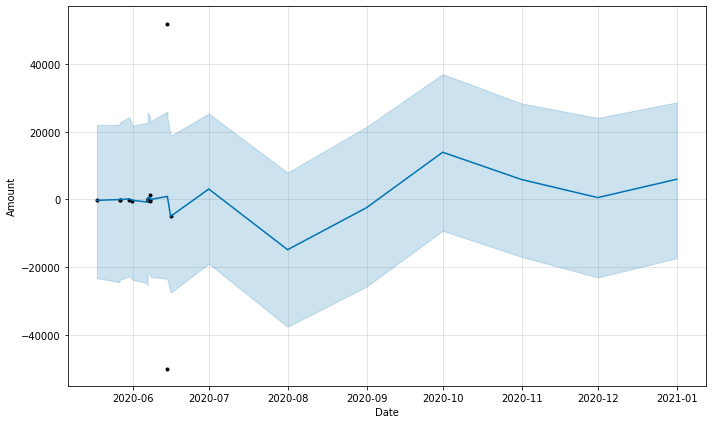

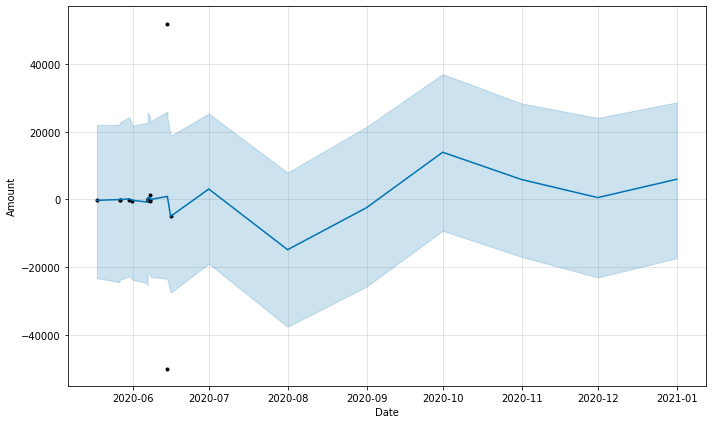

In [127]:
gm_prophet.plot(gm_forecast, xlabel = 'Date', ylabel = 'Amount')

In [106]:
gm_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-05-17 22:43:21.687980,-1961.674214,-23722.761689,22957.309647,-1961.674214,-1961.674214,1714.683563,1714.683563,1714.683563,563.596896,563.596896,563.596896,1151.086667,1151.086667,1151.086667,0.0,0.0,0.0,-246.990651
1,2020-05-26 19:52:13.478424,-1668.807669,-23287.295577,24360.213538,-1668.807669,-1668.807669,1641.458210,1641.458210,1641.458210,-1115.080790,-1115.080790,-1115.080790,2756.539000,2756.539000,2756.539000,0.0,0.0,0.0,-27.349459
2,2020-05-26 19:52:18.651350,-1668.805694,-24102.067945,23813.040018,-1668.805694,-1668.805694,1644.078422,1644.078422,1644.078422,-1112.953670,-1112.953670,-1112.953670,2757.032091,2757.032091,2757.032091,0.0,0.0,0.0,-24.727273
3,2020-05-30 15:56:43.966387,-1542.295747,-23658.297305,24071.524270,-1542.295747,-1542.295747,1707.687810,1707.687810,1707.687810,4597.962032,4597.962032,4597.962032,-2890.274222,-2890.274222,-2890.274222,0.0,0.0,0.0,165.392063
4,2020-05-31 22:01:02.429196,-1500.976875,-22872.519474,25257.179140,-1500.976875,-1500.976875,1284.399149,1284.399149,1284.399149,-229.873253,-229.873253,-229.873253,1514.272402,1514.272402,1514.272402,0.0,0.0,0.0,-216.577726
5,2020-06-06 20:22:19.818627,-1305.380268,-23096.500442,21545.922446,-1305.380268,-1305.380268,522.598811,522.598811,522.598811,-382.026856,-382.026856,-382.026856,904.625667,904.625667,904.625667,0.0,0.0,0.0,-782.781457
6,2020-06-06 20:35:44.146423,-1305.073282,-23244.073439,24017.086010,-1305.073282,-1305.073282,945.194014,945.194014,945.194014,-131.530659,-131.530659,-131.530659,1076.724673,1076.724673,1076.724673,0.0,0.0,0.0,-359.879268
7,2020-06-06 21:25:57.131843,-1303.923319,-22568.423014,23653.836050,-1303.923319,-1303.923319,1719.729736,1719.729736,1719.729736,19.532763,19.532763,19.532763,1700.196973,1700.196973,1700.196973,0.0,0.0,0.0,415.806417
8,2020-06-06 21:27:26.716944,-1303.889127,-22681.729961,24134.287569,-1303.889127,-1303.889127,1726.389283,1726.389283,1726.389283,8.186445,8.186445,8.186445,1718.202838,1718.202838,1718.202838,0.0,0.0,0.0,422.500156
9,2020-06-07 20:15:41.179057,-1272.556234,-23043.060277,24534.800470,-1272.556234,-1272.556234,1873.716845,1873.716845,1873.716845,-531.222183,-531.222183,-531.222183,2404.939028,2404.939028,2404.939028,0.0,0.0,0.0,601.160611


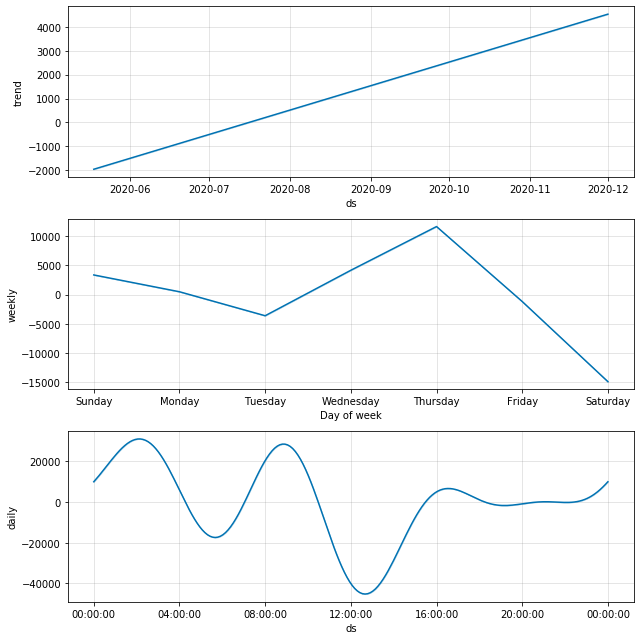

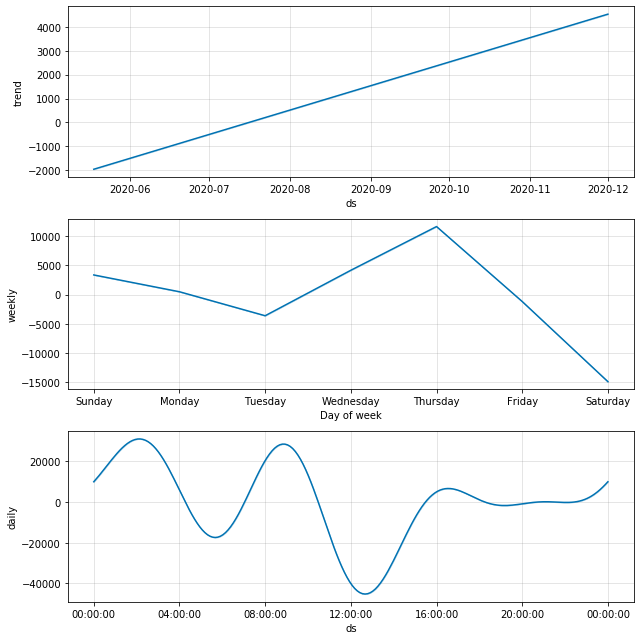

In [107]:
# Plot the trends and patterns
gm_prophet.plot_components(gm_forecast)

In [108]:
arr_month =[]
for index, row in gm_forecast.iterrows():
        arr_month.append({"date":row["ds"],"value":row["yhat"]})
       

In [109]:
arr_weekly =[]
for index, row in gm_forecast.iterrows():
        arr_month.append({"date":row["ds"],"value":row["weekly"]})
       

In [110]:
arr_month

[{'date': Timestamp('2020-05-17 22:43:21.687980'),
  'value': -246.99065093223044},
 {'date': Timestamp('2020-05-26 19:52:13.478424'),
  'value': -27.349458660351274},
 {'date': Timestamp('2020-05-26 19:52:18.651350'),
  'value': -24.72727276464957},
 {'date': Timestamp('2020-05-30 15:56:43.966387'),
  'value': 165.39206326725593},
 {'date': Timestamp('2020-05-31 22:01:02.429196'),
  'value': -216.5777257248085},
 {'date': Timestamp('2020-06-06 20:22:19.818627'),
  'value': -782.7814574496533},
 {'date': Timestamp('2020-06-06 20:35:44.146423'),
  'value': -359.8792675160886},
 {'date': Timestamp('2020-06-06 21:25:57.131843'), 'value': 415.806416508711},
 {'date': Timestamp('2020-06-06 21:27:26.716944'),
  'value': 422.50015567879154},
 {'date': Timestamp('2020-06-07 20:15:41.179057'), 'value': 601.1606109219344},
 {'date': Timestamp('2020-06-07 21:42:21.484986'),
  'value': 284.92883891434167},
 {'date': Timestamp('2020-06-07 22:02:37.561948'),
  'value': -1.6312833419556227},
 {'date'